In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
crash_data = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
crash_data.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

In [6]:
new_cols_data = crash_data[["CRASH_TYPE","POSTED_SPEED_LIMIT", "CRASH_HOUR", "WEATHER_CONDITION"]].copy()

# new_cols_data

new_cols_data.head()

,CRASH_TYPE,POSTED_SPEED_LIMIT,CRASH_HOUR,WEATHER_CONDITION
0,NO INJURY / DRIVE AWAY,45.0,22.0,CLEAR
1,NO INJURY / DRIVE AWAY,30.0,10.0,CLEAR
2,NO INJURY / DRIVE AWAY,25.0,17.0,CLEAR
3,NO INJURY / DRIVE AWAY,30.0,16.0,CLEAR
4,NO INJURY / DRIVE AWAY,30.0,16.0,CLEAR


In [7]:
weather_condition_it_df = new_cols_data[["CRASH_TYPE", "WEATHER_CONDITION"]].copy()
weather_condition_if_df = new_cols_data[["CRASH_TYPE", "WEATHER_CONDITION"]].copy()

weather_condition_if_df.head()

,CRASH_TYPE,WEATHER_CONDITION
0,NO INJURY / DRIVE AWAY,CLEAR
1,NO INJURY / DRIVE AWAY,CLEAR
2,NO INJURY / DRIVE AWAY,CLEAR
3,NO INJURY / DRIVE AWAY,CLEAR
4,NO INJURY / DRIVE AWAY,CLEAR


In [8]:
print(weather_condition_it_df.WEATHER_CONDITION.value_counts())
# print(weather_condition_df.INJURIES_TOTAL.value_counts())
# print(weather_condition_df.isna().sum())

CLEAR                     265522
RAIN                       31578
UNKNOWN                    14555
SNOW                       12052
CLOUDY/OVERCAST            10388
OTHER                       1063
FOG/SMOKE/HAZE               657
SLEET/HAIL                   555
SEVERE CROSS WIND GATE        77
FREEZING RAIN/DRIZZLE         65
BLOWING SNOW                   2
Name: WEATHER_CONDITION, dtype: int64


In [9]:
convert_cat_data = {'CLEAR':'no','RAIN':'yes','UNKNOWN':'yes','SNOW':'yes','CLOUDY/OVERCAST':'yes','OTHER':'yes','FOG/SMOKE/HAZE':'yes', 'SLEET/HAIL':'yes', 'SEVERE CROSS WIND GATE':'yes', 'FREEZING RAIN/DRIZZLE':'yes', 'BLOWING SNOW':'yes'}
weather_condition_it_df = weather_condition_it_df.replace(convert_cat_data)
weather_condition_if_df = weather_condition_if_df.replace(convert_cat_data)

weather_condition_it_df.head()

,CRASH_TYPE,WEATHER_CONDITION
0,NO INJURY / DRIVE AWAY,no
1,NO INJURY / DRIVE AWAY,no
2,NO INJURY / DRIVE AWAY,no
3,NO INJURY / DRIVE AWAY,no
4,NO INJURY / DRIVE AWAY,no


In [10]:
weather_condition_it_df = pd.get_dummies(weather_condition_it_df)
weather_condition_if_df = pd.get_dummies(weather_condition_if_df)

weather_condition_it_df.head()

,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,WEATHER_CONDITION_no,WEATHER_CONDITION_yes
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


In [13]:
weather_condition_it_df = weather_condition_it_df.dropna()
weather_condition_if_df = weather_condition_if_df.dropna()

weather_condition_it_df.head()

,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,WEATHER_CONDITION_no,WEATHER_CONDITION_yes
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


In [32]:
# Assign X (data) and y (target)

X = weather_condition_it_df[['WEATHER_CONDITION_no', 'WEATHER_CONDITION_yes']]
# X = weather_condition_if_df[['WEATHER_CONDITION_no', 'WEATHER_CONDITION_yes']]

y = weather_condition_it_df['CRASH_TYPE_NO INJURY / DRIVE AWAY'].values.reshape(-1, 1)
# y = weather_condition_if_df["INJURIES_FATAL"].values.reshape(-1, 1)

print(X.shape, y.shape)

(336518, 2) (336518, 1)


In [33]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
 # Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
 # Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.001727205297183, R2: 0.0007852371901364563


In [38]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity

from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0020076798276818, R2: 0.0005054661207429811


In [39]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity

from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0017272052588804, R2: 0.0007852372283428943


In [40]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity

from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0018841972283612, R2: 0.0006286390120637808


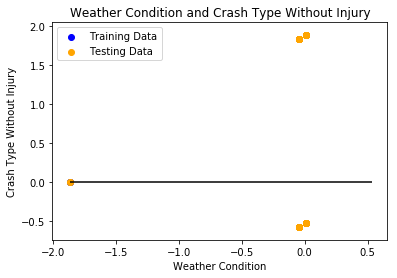

In [41]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.xlabel("Weather Condition")
plt.ylabel("Crash Type Without Injury")
plt.title("Weather Condition and Crash Type Without Injury")
plt.savefig('crash_no_injury_vs_weather_condition.png')
plt.show()